In [1]:
!pip install pyupbit

     |████████████████████████████████| 103 kB 7.1 MB/s 


In [3]:
import pyupbit

In [4]:
df = pyupbit.get_ohlcv("KRW-BTC", interval = "minute60")
df

,open,high,low,close,volume,value
2022-04-05 08:00:00,57097000.0,57297000.0,57000000.0,57055000.0,296.830862,1.695866e+10
2022-04-05 09:00:00,57069000.0,57230000.0,56900000.0,56956000.0,386.354909,2.204575e+10
2022-04-05 10:00:00,56956000.0,57084000.0,56850000.0,57056000.0,174.597771,9.947299e+09
2022-04-05 11:00:00,57072000.0,57223000.0,57032000.0,57113000.0,139.930837,7.996137e+09
2022-04-05 12:00:00,57115000.0,57200000.0,57035000.0,57054000.0,112.193092,6.407321e+09
...,...,...,...,...,...,...
2022-04-13 11:00:00,50218000.0,50548000.0,50143000.0,50447000.0,142.954974,7.197812e+09
2022-04-13 12:00:00,50439000.0,50600000.0,50378000.0,50405000.0,119.655521,6.040812e+09
2022-04-13 13:00:00,50406000.0,50450000.0,50160000.0,50381000.0,132.905018,6.681413e+09
2022-04-13 14:00:00,50383000.0,50449000.0,50318000.0,50390000.0,84.196077,4.242269e+09


In [5]:
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2022-04-05 08:00:00,57055000.0
1,2022-04-05 09:00:00,56956000.0
2,2022-04-05 10:00:00,57056000.0
3,2022-04-05 11:00:00,57113000.0
4,2022-04-05 12:00:00,57054000.0
...,...,...
195,2022-04-13 11:00:00,50447000.0
196,2022-04-13 12:00:00,50405000.0
197,2022-04-13 13:00:00,50381000.0
198,2022-04-13 14:00:00,50390000.0


In [6]:
from fbprophet import Prophet

In [7]:
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [8]:
future = model.make_future_dataframe(periods=48,freq='H')
forecast = model.predict(future)

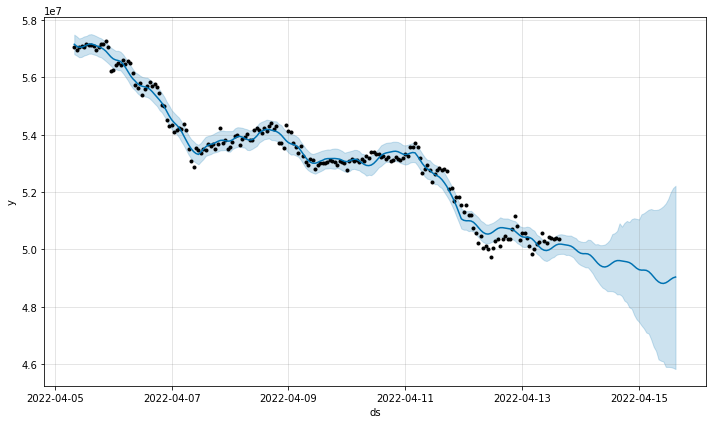

In [9]:
fig1 = model.plot(forecast)

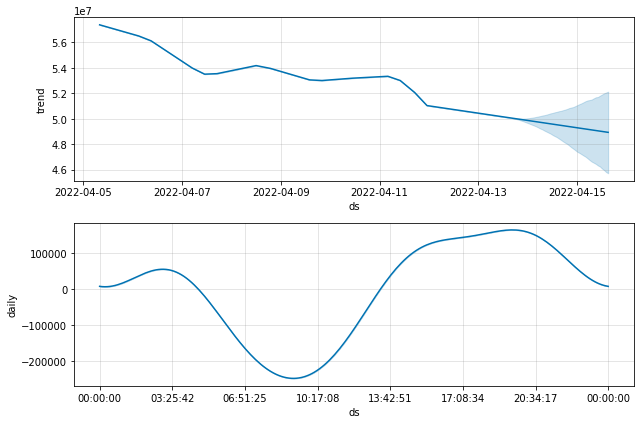

In [10]:
fig2 = model.plot_components(forecast)